# 클린업 1주차 - PyTorch 튜토리얼

클린업 1주차에서는 PyTorch에 대한 간단한 설명과 함께 텐서 자료형 다루기, 모델링 및 간단한 네트워크를 설계해보겠습니다.

1주차는 Google Colab 환경에서 진행되었으며,

이 튜토리얼은 PyTorch 공식 문서를 기반으로 만들었으니 관심이 있는 분들은 아래 튜토리얼을 찾아보셔도 좋을 것 같습니다!

* 파이토치(PyTorch) 기본 익히기, https://tutorials.pytorch.kr/beginner/basics/intro.html
* PyTorch로 딥러닝하기: 60분만에 끝장내기, https://tutorials.pytorch.kr/beginner/deep_learning_60min_blitz.html
* EMNIST (Extended MNIST), https://www.kaggle.com/datasets/crawford/emnist/data


**코랩에 이 파일을 복사하면 동일하게 실행해볼 수 있습니다!**

또한, Part4의 학습을 위한 GPU는 Colab 무료 GPU, T4를 사용하였습니다.

런타임 -> 런타임 유형 변경 -> T4로 바꿀 수 있습니다.

## Introduction

파이토치(PyTorch)는 딥러닝 프레임워크로 TensorFlow와 함께 가장 유명한 프레임워크입니다.

공식 문서에 따르면, PyTorch는 Python 기반의 과학 연산 패키지로 다음 두 가지 목적으로 제공된다고 합니다.

* GPU 및 다른 가속기의 성능을 사용하기 위한 NumPy의 대체제 제공

* 신경망 구현에 유용한 자동 미분(automatic differntiation) 라이브러리 제공

지난 2023년 기준, 가장 유명한 AI 커뮤니티인 HuggingFace에서 PyTorch는 압도적인 점유율을 보여주었습니다.


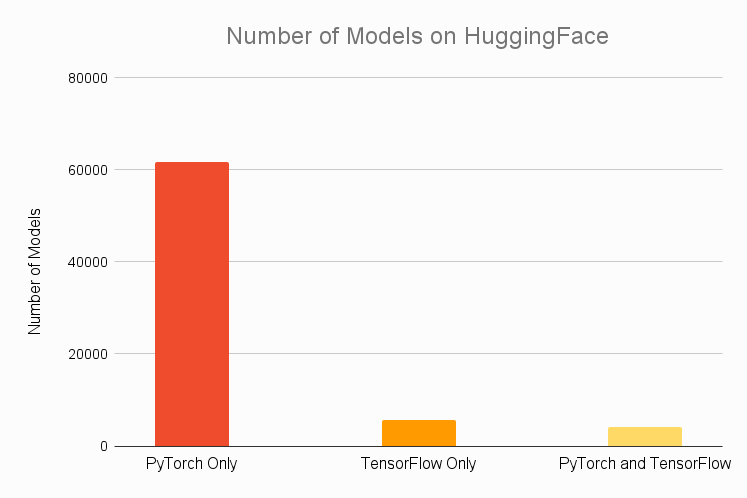

가장 먼저, PyTorch를 로드해보겠습니다. 그리고 수치 계산을 위한 NumPy 또한 로드해주겠습니다.

In [1]:
import torch
import torch.nn as nn
import numpy as np

# Import pprint, module we use for making our print statements prettier
import pprint
pp = pprint.PrettyPrinter()

##Part 1: 텐서(Tensor)

**텐서(tensor)**는 배열(array)이나 행렬(matrix)과 매우 유사한 특수한 자료구조입니다.

PyTorch에서는 텐서를 사용하여 모델의 입력과 출력, 그리고 모델의 매개변수들을 부호화합니다.

각 텐서는 **고차원의 행렬**이라고 생각해줄 수 있습니다. 예를 들어, RGB의 256X256 사이즈 이미지는 `3x256x256`으로 표현되죠

(여기서 첫 번째 차원은 색상 R, G, B를 의미합니다).

텐서는 GPU나 다른 하드웨어 가속기에서 실행할 수 있다는 점만 제외하면 NumPy의 ndarray와 유사합니다.

텐서는 또한 **자동 미분(automatic differentiation)**에 최적화되어 있습니다.

마지막으로 Tensor API는 NumPy의 ndarray와 비슷해서 조금만 연습하면 쉽게 사용할 수 있다는 장점이 있습니다.

이제 실습해보도록 하겠습니다! 텐서를 만들어보겠습니다.

텐서를 만들 때에는 `torch.tensor()` API를 사용해주면 됩니다. 그리고 배열 형태를 입력받기 때문에 파이썬의 리스트로 생성해줄 수 있습니다.


In [2]:
# 텐서 생성
data = torch.tensor([
                     [0, 1],
                     [2, 3],
                     [4, 5]
                    ])
print(data)

tensor([[0, 1],
        [2, 3],
        [4, 5]])


NumPy 배열로부터 생성할 수도 있습니다. 텐서를 ndarray로 바꾸는 작업 또한 가능합니다.

In [3]:
# 텐서 생성 (넘파이 배열로부터)
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(x_np)

tensor([[0, 1],
        [2, 3],
        [4, 5]])


In [4]:
# numpy.ndarray --> torch.Tensor:
arr = np.array([[1, 0, 5]])
data = torch.tensor(arr)
print("텐서: ", data)

# torch.Tensor --> numpy.ndarray:
new_arr = data.numpy()
print("ndarray: ", new_arr)

텐서:  tensor([[1, 0, 5]])
ndarray:  [[1 0 5]]


### 1-1. Data Type

각각의 텐서는 **데이터 타입**을 가지고 있습니다. 주로 사용할 자료형은 실수 자료형 (`torch.float32`)과 정수 자료형 (`torch.int`)입니다.

데이터 생성 시 자료형을 특정지어줄 수도 있습니다.

In [5]:
# float32 자료형으로 데이터 생성하기
# 출력 시 0. 의 형태로 소수점이 표시된다면 실수 자료형이라는 의미입니다.
data = torch.tensor([
                     [0, 1],
                     [2, 3],
                     [4, 5]
                    ], dtype=torch.float32)
print(data)

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])


In [6]:
# float32 자료형으로 데이터 생성하기 (2)
# 소수점 4자리만 표시하는 것을 볼 수 있습니다.
data = torch.tensor([
                     [0.11111111, 1],
                     [2, 3],
                     [4, 5]
                    ], dtype=torch.float32)
print(data)

tensor([[0.1111, 1.0000],
        [2.0000, 3.0000],
        [4.0000, 5.0000]])


In [7]:
# int 자료형으로 데이터 생성하기
data = torch.tensor([
                     [0.11111111, 1],
                     [2, 3],
                     [4, 5]
                    ], dtype=torch.int)
print(data)

tensor([[0, 1],
        [2, 3],
        [4, 5]], dtype=torch.int32)


### 1-2. `shape`

`shape` 메서드는 우리가 텐서의 **차원**을 확인할 때 유용하게 사용할 수 있는 메서드입니다. 텐서의 `.shape`를 통해 접근 가능합니다.

In [8]:
matr_1d = torch.tensor([1, 2])
print(matr_1d.shape)
print(matr_1d)

torch.Size([2])
tensor([1, 2])


In [9]:
matr_2d = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(matr_2d.shape)
print(matr_2d)

torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [10]:
matr_3d = torch.tensor([[[1, 2, 3, 4], [-2, 5, 6, 9]], [[5, 6, 7, 2], [8, 9, 10, 4]], [[-3, 2, 2, 1], [4, 6, 5, 9]]])
print(matr_3d)
print(matr_3d.shape)

tensor([[[ 1,  2,  3,  4],
         [-2,  5,  6,  9]],

        [[ 5,  6,  7,  2],
         [ 8,  9, 10,  4]],

        [[-3,  2,  2,  1],
         [ 4,  6,  5,  9]]])
torch.Size([3, 2, 4])


### 1-3. `reshape`

`reshape` 메서드는 텐서의 차원을 바꾸는 메서드입니다. `view` 메서드를 통해서도 동일한 작업을 수행할 수 있습니다.

보통 딥러닝의 학습은 Batch 단위로 일어나는데, 이를 좀 더 편리하게 하기 위해 많이 사용됩니다.

ex) `4x6 => 24` / `3x8x8 => 3x64`

In [11]:
# reshape (reshape 메서드)
rr = torch.arange(1, 16)  # 1 ~ 15까지 데이터 생성 (step=1)
print("Before reshaping", rr.shape)
print("Before reshaping", rr)
print()

rr = rr.reshape(5, 3)  # reshape: using reshape method
print("After reshaping", rr.shape)
print("After reshaping", rr)

Before reshaping torch.Size([15])
Before reshaping tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

After reshaping torch.Size([5, 3])
After reshaping tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])


In [12]:
# reshape (view 메서드)
rr = torch.arange(1, 97, 2)  # 1 ~ 95까지 데이터 생성 (step=2)
print("Before reshaping", rr.shape)
print("Before reshaping", rr)
print()

rr = rr.view(3, 4, 4)  # reshape: using view method
print("After reshaping", rr.shape)
print("After reshaping", rr)

Before reshaping torch.Size([48])
Before reshaping tensor([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
        37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71,
        73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95])

After reshaping torch.Size([3, 4, 4])
After reshaping tensor([[[ 1,  3,  5,  7],
         [ 9, 11, 13, 15],
         [17, 19, 21, 23],
         [25, 27, 29, 31]],

        [[33, 35, 37, 39],
         [41, 43, 45, 47],
         [49, 51, 53, 55],
         [57, 59, 61, 63]],

        [[65, 67, 69, 71],
         [73, 75, 77, 79],
         [81, 83, 85, 87],
         [89, 91, 93, 95]]])


만약 양의 정수가 아닌 -1을 view의 인자로 넣어준다면, 텐서가 차원을 스스로 계산하여 변환해줍니다.

In [13]:
# reshape (2) (view 메서드)
rr = torch.arange(1, 97, 2)  # 1 ~ 95까지 데이터 생성 (step=2)
rr1 = rr.view(-1)  # (48)
rr2 = rr.view(3, -1)  # (3, 16)
rr3 = rr.view(3, 4, -1)  # (3, 4, 4)

print("Before reshaping", rr.shape)
print("Before reshaping", rr)

print()
print("rr1\n", rr1.shape)
print(rr1)
print("rr2\n", rr2.shape)
print(rr2)
print("rr3\n", rr3.shape)
print(rr3)

Before reshaping torch.Size([48])
Before reshaping tensor([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
        37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71,
        73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95])

rr1
 torch.Size([48])
tensor([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
        37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71,
        73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95])
rr2
 torch.Size([3, 16])
tensor([[ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
        [33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63],
        [65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95]])
rr3
 torch.Size([3, 4, 4])
tensor([[[ 1,  3,  5,  7],
         [ 9, 11, 13, 15],
         [17, 19, 21, 23],
         [25, 27, 29, 31]],

        [[33, 35, 37, 39],
         [41, 43, 45, 47],
         [49, 51, 53, 55],
         [57, 59, 61, 63]]

### 1-4. 다양한 유틸리티 함수들

PyTorch에는 텐서를 만들기 위한 다양한 함수들이 존재합니다. 이 함수들을 사용하면 텐서 생성을 좀 더 편리하게 할 수 있습니다.

그 중, 대표적인 몇 가지만 소개하도록 하겠습니다.

In [14]:
# zero 메서드: 모든 요소들이 0으로 초기화됩니다.
# 아래의 예시에서는 모든 요소가 0인 2x5의 크기의 텐서 하나가 만들어집니다.
zeros = torch.zeros(2, 5)
print(zeros)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [15]:
# one 메서드: 모든 요소들이 1로 초기화됩니다.
ones = torch.ones(3, 4)
print(ones)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [16]:
# arange 메서드: 앞에서 봤듯이 [a, b) 범위 안에 일정한 스텝으로 텐서를 생성합니다.
rr = torch.arange(10, 1, -1)
print(rr)

tensor([10,  9,  8,  7,  6,  5,  4,  3,  2])


In [17]:
# randn 메서드: N(0, 1)을 따르는 랜덤한 수를 만들어냅니다.
rr = torch.randn(3, 4)
print(rr)

tensor([[-0.2658, -0.5946, -0.5038, -0.1356],
        [-1.7702, -0.5285,  0.1617, -0.7729],
        [-2.3376,  0.0307, -2.3166,  0.3549]])


In [18]:
# randint 메서드: [a, b] 범위 이내의 랜덤한 정수를 만들어냅니다.
rr = torch.randint(1, 100, (3, 4))
print(rr)

tensor([[37, 39, 43, 33],
        [45, 25, 34, 51],
        [33, 75, 99, 34]])


### 1-5. 텐서 연산

이제 텐서 연산을 해보도록 하겠습니다.

가장 먼저 덧셈과 연산을 해보겠습니다. 일반적인 덧셈 연산은 원소끼리 적용됩니다.

텐서끼리의 연산 또한 가능하나, 어디까지나 행렬의 연산이 가능한 형태이어야 합니다.

In [19]:
# 텐서의 덧셈
rr = torch.arange(10, 1, -1)
rr + 2

tensor([12, 11, 10,  9,  8,  7,  6,  5,  4])

In [20]:
# 텐서의 덧셈 (2)
a = torch.tensor([[1, 2], [2, 3], [4, 5]])
b = torch.tensor([[5, 8], [3, 2], [0, 12]])

a + b

tensor([[ 6, 10],
        [ 5,  5],
        [ 4, 17]])

뺄셈과 나눗셈도 마찬가지입니다.

In [21]:
# 텐서의 뺄셈
rr = torch.arange(10, 1, -1)
rr - 6

tensor([ 4,  3,  2,  1,  0, -1, -2, -3, -4])

In [22]:
# 텐서의 뺄셈 (2)
a = torch.tensor([[1, 2], [2, 3], [4, 5]])
b = torch.tensor([[5, 8], [3, 2], [0, 12]])

a - b

tensor([[-4, -6],
        [-1,  1],
        [ 4, -7]])

In [23]:
# 텐서의 나눗셈
rr = torch.arange(10, 1, -1)
rr / 2

tensor([5.0000, 4.5000, 4.0000, 3.5000, 3.0000, 2.5000, 2.0000, 1.5000, 1.0000])

In [24]:
# 텐서의 나눗셈 (2)
# PyTorch에서는 0으로 나누어준 부분 또한 오류가 나지 않고 inf로 계산됩니다.
a = torch.tensor([[1, 2], [2, 3], [4, 5]])
b = torch.tensor([[5, 8], [3, 2], [0, 12]])

a / b

tensor([[0.2000, 0.2500],
        [0.6667, 1.5000],
        [   inf, 0.4167]])

이번에는 텐서의 곱셈을 진행해보겠습니다. 텐서의 곱셈은 두 가지가 존재합니다.

첫 번째는 **원소끼리의 곱 (Hadamard Product)**이고, 두 번째는 **행렬 곱 (Matrix multiplication)**입니다.

먼저 원소끼리의 곱부터 살펴보겠습니다. 텐서에 스칼라를 곱하면, 원소끼리 곱해집니다.

동일한 차원의 텐서 곱셈은 우리가 일반적으로 곱셈에 사용하는 `*` 연산을 통해 진행할 수 있습니다.

단, 원소 곱이기 때문에 두 텐서의 차원이 동일해야 합니다.

In [25]:
# 텐서의 곱셈 (원소 곱)
rr * 2

tensor([20, 18, 16, 14, 12, 10,  8,  6,  4])

In [26]:
# 텐서의 곱셈 (2) (원소 곱)
a = torch.tensor([[1, 2], [2, 3], [4, 5]])
b = torch.tensor([[5, 8], [3, 2], [0, 12]])

print(a.shape)
print(a)
print(b.shape)
print(b)
print()
print("Hadamard Product\n", a * b)

torch.Size([3, 2])
tensor([[1, 2],
        [2, 3],
        [4, 5]])
torch.Size([3, 2])
tensor([[ 5,  8],
        [ 3,  2],
        [ 0, 12]])

Hadamard Product
 tensor([[ 5, 16],
        [ 6,  6],
        [ 0, 60]])


행렬 곱은 원소 곱과 연산 기호가 다릅니다. PyTorch에서는 `@` 기호를 통해 행렬 곱을 지원하고 있습니다.

또는 `matmul` 메서드를 통해서도 행렬 곱을 할 수 있습니다.

In [27]:
# 텐서의 곱셈 (행렬 곱)
a = torch.tensor([[1, 2], [2, 3], [4, 5]])      # (3, 2) == 3 rows * 2 cols
b = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])  # (2, 4)

print(a)
print(b)
print()
# (3, 2) X (2, 4) => (3, 4)
print("Product 1\n", a.matmul(b))
print("Product 2\n", a @ b)

tensor([[1, 2],
        [2, 3],
        [4, 5]])
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

Product 1
 tensor([[11, 14, 17, 20],
        [17, 22, 27, 32],
        [29, 38, 47, 56]])
Product 2
 tensor([[11, 14, 17, 20],
        [17, 22, 27, 32],
        [29, 38, 47, 56]])


In [28]:
# 텐서의 곱셈 (2) (행렬 곱)
a = torch.tensor([[1, 2], [2, 3], [4, 5]])      # (3, 2) == 3 rows * 2 cols
b = torch.tensor([[10], [5]])  # (2, 1)

print(a)
print(b)
print()
# (3, 2) X (2, 1) => (3, 1)
print("Product 1\n", a.matmul(b))
print("Product 2\n", a @ b)

tensor([[1, 2],
        [2, 3],
        [4, 5]])
tensor([[10],
        [ 5]])

Product 1
 tensor([[20],
        [35],
        [65]])
Product 2
 tensor([[20],
        [35],
        [65]])


간단한 통계량 또한 메서드들을 통해 구해줄 수 있습니다.

PyTorch의 특징은 이러한 통계량들을 **차원에 따라** 병렬적으로 구해줄 수 있다는 것입니다.

In [29]:
# 병렬 연산
data = torch.arange(1, 36, dtype=torch.float32).reshape(5, 7)
print(data)

print("열 별로 합")
print(data.sum(dim=0))

print("행 별로 합")
print(data.sum(dim=1))

print("전체 원소 합")
print(data.sum())

print("행 별로 표준편차")
print(data.std(dim=1))

tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19., 20., 21.],
        [22., 23., 24., 25., 26., 27., 28.],
        [29., 30., 31., 32., 33., 34., 35.]])
열 별로 합
tensor([ 75.,  80.,  85.,  90.,  95., 100., 105.])
행 별로 합
tensor([ 28.,  77., 126., 175., 224.])
전체 원소 합
tensor(630.)
행 별로 표준편차
tensor([2.1602, 2.1602, 2.1602, 2.1602, 2.1602])


In [30]:
# 병렬 연산 (2)
data = torch.arange(1, 71, dtype=torch.float32).reshape(2, 5, 7)
print(data)

print("1차원을 기준으로")
print(data.mean(dim=0))

print("2차원을 기준으로")
print(data.mean(dim=1))

print("3차원을 기준으로")
print(data.mean(dim=2))

print("전체 원소 합")
print(data.mean())

tensor([[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19., 20., 21.],
         [22., 23., 24., 25., 26., 27., 28.],
         [29., 30., 31., 32., 33., 34., 35.]],

        [[36., 37., 38., 39., 40., 41., 42.],
         [43., 44., 45., 46., 47., 48., 49.],
         [50., 51., 52., 53., 54., 55., 56.],
         [57., 58., 59., 60., 61., 62., 63.],
         [64., 65., 66., 67., 68., 69., 70.]]])
1차원을 기준으로
tensor([[18.5000, 19.5000, 20.5000, 21.5000, 22.5000, 23.5000, 24.5000],
        [25.5000, 26.5000, 27.5000, 28.5000, 29.5000, 30.5000, 31.5000],
        [32.5000, 33.5000, 34.5000, 35.5000, 36.5000, 37.5000, 38.5000],
        [39.5000, 40.5000, 41.5000, 42.5000, 43.5000, 44.5000, 45.5000],
        [46.5000, 47.5000, 48.5000, 49.5000, 50.5000, 51.5000, 52.5000]])
2차원을 기준으로
tensor([[15., 16., 17., 18., 19., 20., 21.],
        [50., 51., 52., 53., 54., 55., 56.]])
3차원을 기준으로
tensor([[ 4., 11., 18., 25., 32.],
        [39., 

### 1-6. 인덱싱

텐서의 인덱싱은 파이썬의 리스트 인덱싱과 매우 유사합니다. `[]` 연산을 통해 인덱싱할 수 있습니다.

In [31]:
x = torch.Tensor([
                  [[1, 2], [3, 4]],
                  [[5, 6], [7, 8]],
                  [[9, 10], [11, 12]]
                 ])
print(x.shape)
print(x)

torch.Size([3, 2, 2])
tensor([[[ 1.,  2.],
         [ 3.,  4.]],

        [[ 5.,  6.],
         [ 7.,  8.]],

        [[ 9., 10.],
         [11., 12.]]])


In [32]:
print(x[:, :, 0])
print(x[:, 0]) # = x[:, 0, :]
print(x[0, :]) # = x[0, :, :]
print(x[0]) # x의 첫 번째 원소 (2x2)
print(x[0, 0]) # x의 첫 번째 원소 (1x2)

tensor([[ 1.,  3.],
        [ 5.,  7.],
        [ 9., 11.]])
tensor([[ 1.,  2.],
        [ 5.,  6.],
        [ 9., 10.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([1., 2.])


In [33]:
print(x[1:])
print(x[0, 1, 1])
print(x[1:3, 0:1, 0:1]) # = x[1:3, 0, 0] = x[[1,2], 0, 0]

tensor([[[ 5.,  6.],
         [ 7.,  8.]],

        [[ 9., 10.],
         [11., 12.]]])
tensor(4.)
tensor([[[5.]],

        [[9.]]])


아래와 같이 `torch.tensor()` API를 사용하면 해당 인덱스로 접근할 수 있습니다.

In [34]:
# 0번째와 1번째 요소 접근하기 (두 번씩)
i = torch.tensor([0, 0, 1, 1])
x[i]

tensor([[[1., 2.],
         [3., 4.]],

        [[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]],

        [[5., 6.],
         [7., 8.]]])

In [35]:
# 연속적으로 적용하기
i = torch.tensor([1, 2])
j = torch.tensor([0])
x[i, j]

tensor([[ 5.,  6.],
        [ 9., 10.]])

스칼라 값은 `item()` 메서드를 통해 얻을 수 있습니다. 배열 형태는 접근할 수 없으니 참고해주세요.

In [36]:
print(x[2, 0, 0])
print(x[2, 0, 0].item())

tensor(9.)
9.0


## Part2: 자동미분 (Autograd)

신경망을 학습할때, 가장 자주 사용되는 알고리즘은 **역전파**입니다.

이 알고리즘에서 매개변수는 주어진 매개변수에 대한 손실 함수의 기울기 (gradient)에 따라 조정되죠.

이러한 변화도를 계산하기 위해 PyTorch에는 `torch.autograd`라고 불리는 자동 미분 엔진이 내장되어 있습니다.

이는 모든 계산 그래프에 대한 gradient 자동 계산을 지원합니다.

이 때, 자동 미분할 텐서들은 `requires_grad=True`를 파라미터로 함께 지정해주어야 합니다.

생성 시 이 옵션을 지정해주지 않았더라도, 나중에 `x.requires_grad_(True)`메소드를 사용할 수도 있습니다.

입력 x, 매개변수 w와 b , 그리고 일부 손실 함수가 있는 가장 간단한 단일 계층 신경망을 가정하겠습니다.

PyTorch에서는 다음과 같이 정의할 수 있습니다.

In [37]:
# 간단한 단일 계층 신경망 가정하기
x = torch.ones(5)  # input tensor (1, 5)
y = torch.zeros(3)  # expected output (1, 3)
w = torch.randn(5, 3, requires_grad=True)  # weight tensor (5, 3)
b = torch.randn(3, requires_grad=True)  # bias tensor (1, 3)
z = torch.matmul(x, w) + b  # Z = Wx + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

### 2-1. 역전파

Gradient 계산은 `backward()` 메서드를 통해서 해줄 수 있습니다. 이 메서드를 통해 우리는 역전파 계산을 할 수가 있습니다.

In [38]:
# 역전파 계산 후 Gradient 확인하기
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0093, 0.0102, 0.1270],
        [0.0093, 0.0102, 0.1270],
        [0.0093, 0.0102, 0.1270],
        [0.0093, 0.0102, 0.1270],
        [0.0093, 0.0102, 0.1270]])
tensor([0.0093, 0.0102, 0.1270])


그러나 우리는 역전파를 통한 업데이트를 피하고 싶은 경우가 있습니다.

예를 들어 모델을 테스트하는 과정이라면 가중치의 업데이트가 있어선 안 되겠죠.

이 때는 `with torch.no_grad():` 구문을 통해 업데이트를 막을 수 있습니다.

`detach()` 메서드를 사용해도 동일한 결과를 얻을 수 있습니다.

In [39]:
# 역전파 O
z = torch.matmul(x, w)+b
print(z.requires_grad)

# 역전파 X
with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

# 역전파 X
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

True
False
False


### 2-2. Optimizer

이제 우리는 역전파를 통한 기울기 계산을 할 수 있게 되었습니다!

그 방법은 `backward()` 메서드를 통해 간단히 할 수 있었죠.

이번에는 업데이트된 기울기를 적용하여 모델을 최적화시키는 **Optimizer**에 대해
알아볼 차례입니다.



1주차에서 배웠듯이 신경망 학습을 위한 다양한 optimizer들이 존재합니다.

가장 기본적인 경사 하강법 GD부터 일반적으로 많이 쓰이는 SGD, Adam, RMSProp 등이 있죠.

PyTorch에서는 이러한 다양한 최적화 알고리즘들을 `torch.optim` 패키지를 통해
제공하고 있습니다.

이번에는 우리가 만든 간단한 신경망을 실제로 학습시켜 보겠습니다!

아래 코드를 통해 학습시킬 수 있으며, 20번 (20 epoch)만 학습을 진행하겠습니다.

이 코드에서는 가장 많이 쓰이는 Optimizer인 SGD를 사용하였습니다.

각 코드에 대한 추가적인 설명입니다.

* 처음에 등장하는 `torch.device()` 코드는 GPU 사용을 위한 코드입니다. GPU는 병렬 처리가 가능하기 때문에<br> CPU에 비해 텐서 연산이 빠릅니다.

* `torch.optim.SGD([w, b], lr=learning_rate)` 코드는 가중치를 업데이트할 텐서 `w, b`를 전달하고 학습률을 전달하는 코드입니다.

* `loss.backward()`로 역전파를 진행하기 이전에, `optimizer.zero_grad()`를 하였습니다. 이것은 optimizer의 기울기를 초기화시켜주는<br> 작업입니다. 이 작업을 하지 않으면 optimizer는 **기울기를 누적**해가기 때문에 정상적인 매개변수 업데이트가 이뤄지지 않습니다.

* `optimizer.step()`은 계산된 기울기에 맞게 가중치를 업데이트하는 코드입니다.

In [40]:
import time

# GPU를 사용할 수 있는지 확인
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 데이터 정의
x = torch.ones(20).to(device)  # input tensor (1, 20)
y = torch.zeros(3).to(device)  # expected output (1, 3)
w = torch.randn(20, 3, requires_grad=True, device=device)  # weight tensor (20, 3)
b = torch.randn(3, requires_grad=True, device=device)  # bias tensor (1, 3)

# 학습을 위한 반복
learning_rate = 0.1
optimizer = torch.optim.SGD([w, b], lr=learning_rate)
loss_fn = nn.MSELoss()

# 학습 시작
s = time.time()
for epoch in range(20):
    # 순전파
    z = torch.matmul(x, w) + b  # Z = Wx + b
    loss = loss_fn(z, y)

    # 역전파
    optimizer.zero_grad()
    loss.backward()

    # Weight 업데이트
    optimizer.step()

    # 진행 상황 출력
    print(f'Epoch [{epoch+1}/20], Loss: {loss.item():.4f}')

# 학습 종료
e = time.time()
print(f"Elapsed time: {e-s:.4f}")

# 최종 학습된 모델의 파라미터 출력
print("Trained weights:", w)
print("Trained bias:", b)

Epoch [1/20], Loss: 18.0920
Epoch [2/20], Loss: 2.8947
Epoch [3/20], Loss: 0.4632
Epoch [4/20], Loss: 0.0741
Epoch [5/20], Loss: 0.0119
Epoch [6/20], Loss: 0.0019
Epoch [7/20], Loss: 0.0003
Epoch [8/20], Loss: 0.0000
Epoch [9/20], Loss: 0.0000
Epoch [10/20], Loss: 0.0000
Epoch [11/20], Loss: 0.0000
Epoch [12/20], Loss: 0.0000
Epoch [13/20], Loss: 0.0000
Epoch [14/20], Loss: 0.0000
Epoch [15/20], Loss: 0.0000
Epoch [16/20], Loss: 0.0000
Epoch [17/20], Loss: 0.0000
Epoch [18/20], Loss: 0.0000
Epoch [19/20], Loss: 0.0000
Epoch [20/20], Loss: 0.0000
Elapsed time: 0.2872
Trained weights: tensor([[ 1.0405,  0.7602, -0.3310],
        [ 1.6736, -0.8030, -0.6637],
        [ 0.9302, -0.2324, -1.3600],
        [ 1.0610, -0.3241,  0.9592],
        [-0.0989, -0.0333, -0.0075],
        [ 0.2483,  0.7558, -0.6325],
        [ 0.8356, -0.1304, -0.5194],
        [-1.4397,  0.1731, -0.2969],
        [ 0.3313,  0.4177,  2.0636],
        [ 1.0774, -0.2905,  0.3999],
        [-0.6020, -2.5847, -0.3720],
   

In [41]:
print(x)
print(torch.matmul(x, w) + b)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.], device='cuda:0')
tensor([-1.1921e-07,  4.4703e-08, -5.9605e-07], device='cuda:0',
       grad_fn=<AddBackward0>)


결과를 보면 x=[1] * 20 데이터와 y=[0, 0, 0] 데이터를 신경망이 잘 학습하였다는 것을 볼 수 있습니다!

위의 신경망은 torch의 선형 레이어인 `nn.Linear()` 모듈로 정확히 동일한 일을 할 수 있습니다.

> `nn.Linear(h_in, h_out)`

위에서는 SGD에 가중치인 `w`와 편향 `b`를 학습할 수 있게끔 넣어주었지만, 이제는 `layer.parameters()`를 통해 전달할 수 있습니다.

In [42]:
import time

# GPU를 사용할 수 있는지 확인
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 데이터 정의
x = torch.ones(20).to(device)  # input tensor (1, 20)
y = torch.zeros(3).to(device)  # expected output (1, 3)
fc = nn.Linear(20, 3).to(device) # Z = Wx + b

# 학습을 위한 반복
learning_rate = 0.1
optimizer = torch.optim.SGD(fc.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

# 학습 시작
s = time.time()
for epoch in range(20):
    # 순전파
    z = fc(x)
    loss = loss_fn(z, y)

    # 역전파
    optimizer.zero_grad()
    loss.backward()

    # Weight 업데이트
    optimizer.step()

    # 진행 상황 출력
    print(f'Epoch [{epoch+1}/20], Loss: {loss.item():.4f}')

# 학습 종료
e = time.time()
print(f"Elapsed time: {e-s:.4f}")

# 최종 학습된 모델의 파라미터 출력
print("Trained weights:", fc.weight)
print("Trained bias:", fc.bias)

Epoch [1/20], Loss: 0.7109
Epoch [2/20], Loss: 0.1138
Epoch [3/20], Loss: 0.0182
Epoch [4/20], Loss: 0.0029
Epoch [5/20], Loss: 0.0005
Epoch [6/20], Loss: 0.0001
Epoch [7/20], Loss: 0.0000
Epoch [8/20], Loss: 0.0000
Epoch [9/20], Loss: 0.0000
Epoch [10/20], Loss: 0.0000
Epoch [11/20], Loss: 0.0000
Epoch [12/20], Loss: 0.0000
Epoch [13/20], Loss: 0.0000
Epoch [14/20], Loss: 0.0000
Epoch [15/20], Loss: 0.0000
Epoch [16/20], Loss: 0.0000
Epoch [17/20], Loss: 0.0000
Epoch [18/20], Loss: 0.0000
Epoch [19/20], Loss: 0.0000
Epoch [20/20], Loss: 0.0000
Elapsed time: 0.0536
Trained weights: Parameter containing:
tensor([[ 0.0298, -0.1202, -0.1079, -0.0737, -0.1174,  0.0113,  0.0152,  0.0785,
          0.0106,  0.0673,  0.2492, -0.0606,  0.0172,  0.0481, -0.1459, -0.0426,
          0.0139,  0.1227, -0.1161,  0.0522],
        [-0.1679, -0.0998, -0.1443, -0.0664,  0.1005,  0.0260, -0.1459, -0.0704,
          0.0057,  0.2474,  0.2563, -0.0210,  0.1860,  0.1414, -0.1773, -0.1044,
         -0.0773,  

## Part3: 신경망 만들기

지금까지 텐서와 자동미분에 대해 알아보고, PyTorch에서 신경망을 학습하는 실습을 해봤습니다.

저희는 신경망을 만들기 위해 PyTorch의 신경망 모듈인 `torch.nn`을 사용할 수 있습니다.

이 안에는 수많은 블록들이 이미 정의되어 있어서 간편하게 쓸 수 있습니다.

먼저 아래의 코드로 `nn` 모듈을 불러오겠습니다.

In [43]:
import torch.nn as nn

신경망을 만들기 전, 다른 모듈들에 대해 간단히 짚고 넘어가겠습니다.

### 3-1. 활성화함수 (Activations)

지금까지 우리는 `nn.Linear()`로 선형 레이어를 만들어서 학습을 진행하였습니다.

그러나 선형 레이어만으로는 복잡한 데이터들의 **비선형적 특징들을 학습할 수 없다**는 큰 단점이 있습니다.

따라서 이러한 비선형적 특징들을 배우기 위해 활성화함수를 사용해주어야 합니다.

`nn` 모듈 안에는 `nn.ReLU()`, `nn.Sigmoid()`, `nn.Tanh()`, `nn.Softmax()` 등 수많은 비선형 활성화함수들이 들어있습니다.

In [44]:
# 활성화함수 사용예시
x = torch.randn(2, 5)

relu = nn.ReLU()
sigmoid = nn.Sigmoid()
tanh = nn.Tanh()

def activation(x, name):
  if name == 'relu':
    return relu(x)
  elif name == 'sigmoid':
    return sigmoid(x)
  elif name == 'tanh':
    return tanh(x)

print("활성화 함수 적용 이전")
print(x)
print()
print("활성화 함수 적용 후")
print("ReLU:", activation(x, "relu"))
print("Sigmoid:", activation(x, "sigmoid"))
print("Tanh:", activation(x, "tanh"))

활성화 함수 적용 이전
tensor([[-0.5727, -1.2300, -1.5024, -0.6441, -0.8078],
        [ 0.1546, -1.2147, -0.5987,  0.7741, -0.9896]])

활성화 함수 적용 후
ReLU: tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1546, 0.0000, 0.0000, 0.7741, 0.0000]])
Sigmoid: tensor([[0.3606, 0.2262, 0.1821, 0.3443, 0.3084],
        [0.5386, 0.2289, 0.3546, 0.6844, 0.2710]])
Tanh: tensor([[-0.5173, -0.8426, -0.9056, -0.5677, -0.6684],
        [ 0.1534, -0.8381, -0.5361,  0.6493, -0.7572]])


### 3-2. Pipeline 만들기

PyTorch에서는 이를 `nn.Sequential()` 함수를 컨테이너로 사용하여 파이프라인을 만들 수 있습니다.

이를 통해 레이어를 쌓는 것이 가능해집니다.

In [45]:
# 파이프라인 만들기
block = nn.Sequential(
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 2),
    nn.Sigmoid()
)

input = torch.ones(2,3,4)
output = block(input)
output

tensor([[[0.5438, 0.5724],
         [0.5438, 0.5724],
         [0.5438, 0.5724]],

        [[0.5438, 0.5724],
         [0.5438, 0.5724],
         [0.5438, 0.5724]]], grad_fn=<SigmoidBackward0>)

### 3-3. 이밖의 다른 레이어들

이 밖에도 PyTorch의 `nn` 모듈에서는 수많은 레이어들을 제공하고 있습니다.

CNN을 위한 `nn.Conv2d, nn.MaxPool2d`, 트랜스포머 모듈인 `nn.Transformer`, 정규화 기법인 `nn.BatchNorm2d` 등이 그것이죠.

아래의 공식 문서에 들어가보면, 수많은 레이어들을 확인해볼 수 있습니다.

PyTorch 공식 문서: https://pytorch.org/docs/stable/nn.html

### 3-4. 커스텀 모듈

이미 존재하는 블록들을 사용하여, 우리는 커스텀 모듈을 만들 수 있습니다.

커스텀 클래스에 `nn.Module`을 상속받고, 생성자인 `__init__`과 학습을 위한 `forward()` 함수를 구현하면 됩니다.

In [46]:
class MultilayerPerceptron(nn.Module):

  def __init__(self, input_size, hidden_size):
    # 부모 클래스 메서드 호출
    super(MultilayerPerceptron, self).__init__()

    self.input_size = input_size
    self.hidden_size = hidden_size

    # 모델 정의하기
    self.model = nn.Sequential(
        nn.Linear(self.input_size, self.hidden_size),
        nn.ReLU(),
        nn.Linear(self.hidden_size, self.input_size),
        nn.Sigmoid()
    )

  def forward(self, x):
    output = self.model(x)
    return output

아래는 학습 예시입니다.

In [47]:
input = torch.randn(2, 5)

# 커스텀 모델 생성
model = MultilayerPerceptron(5, 3)

# 모델 학습
output = model(input)
print(input)
print(output)

tensor([[ 0.9646, -1.4156, -0.1291,  1.9118, -0.2328],
        [ 2.1474,  0.9748, -0.4658,  1.6022,  0.3557]])
tensor([[0.3498, 0.5606, 0.3020, 0.5706, 0.6809],
        [0.4386, 0.5289, 0.3778, 0.4498, 0.6343]], grad_fn=<SigmoidBackward0>)


`named_parameters()`나 `parameters()` 메서드로 파라미터를 살펴볼 수 있습니다.



In [48]:
list(model.named_parameters())

[('model.0.weight',
  Parameter containing:
  tensor([[-0.2409,  0.1008,  0.0791,  0.3951, -0.0096],
          [-0.1892, -0.3318, -0.2726,  0.2322,  0.0659],
          [ 0.0192, -0.0043, -0.1629, -0.3706,  0.0619]], requires_grad=True)),
 ('model.0.bias',
  Parameter containing:
  tensor([-0.1939,  0.0397,  0.4202], requires_grad=True)),
 ('model.2.weight',
  Parameter containing:
  tensor([[-0.2883, -0.4070, -0.0693],
          [-0.3088,  0.2312,  0.1234],
          [ 0.1094, -0.4534,  0.1246],
          [ 0.2437,  0.5596,  0.5632],
          [-0.0728,  0.2783, -0.3946]], requires_grad=True)),
 ('model.2.bias',
  Parameter containing:
  tensor([-0.2469,  0.1157, -0.4990, -0.2016,  0.5509], requires_grad=True))]

In [49]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.2409,  0.1008,  0.0791,  0.3951, -0.0096],
         [-0.1892, -0.3318, -0.2726,  0.2322,  0.0659],
         [ 0.0192, -0.0043, -0.1629, -0.3706,  0.0619]], requires_grad=True),
 Parameter containing:
 tensor([-0.1939,  0.0397,  0.4202], requires_grad=True),
 Parameter containing:
 tensor([[-0.2883, -0.4070, -0.0693],
         [-0.3088,  0.2312,  0.1234],
         [ 0.1094, -0.4534,  0.1246],
         [ 0.2437,  0.5596,  0.5632],
         [-0.0728,  0.2783, -0.3946]], requires_grad=True),
 Parameter containing:
 tensor([-0.2469,  0.1157, -0.4990, -0.2016,  0.5509], requires_grad=True)]

## Part4: EMNIST 데이터셋 학습하기

실습입니다! 비전 데이터인 `EMNIST` 데이터에 대해 학습을 진행해보겠습니다. `EMNIST` 데이터는 `torchvision` 데이터셋에 있습니다.

EMNIST 데이터는 MNIST 데이터의 확장판으로, 총 47개의 레이블을 가지고 있습니다. 각 이미지 데이터는 `28x28` 데이터입니다.

여러 가지 버전의 데이터셋이 있지만, 저희는 Balanced 버전의 데이터셋을 가져오겠습니다.

세부사항은 아래와 같습니다.

* train: 112,800
* test: 18,800
* total: 131,600
* classes: 47 (balanced)


우선 데이터를 불러와주겠습니다.

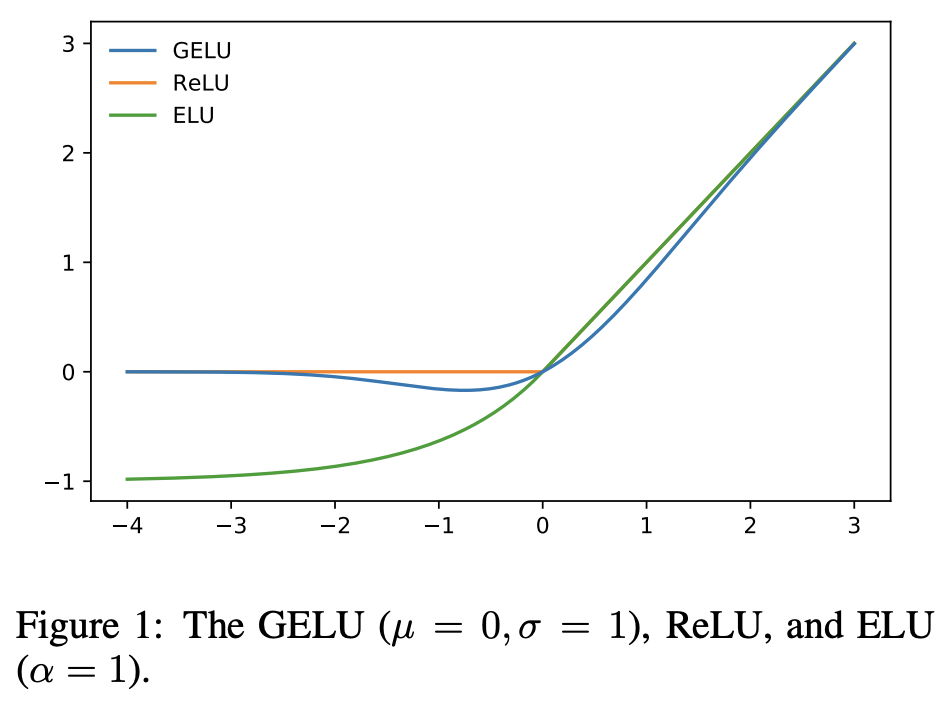

### 4-1. 데이터 로드하기

PyTorch에는 데이터셋을 위한 `Dataset`과 `DataLoader` 모듈이 있습니다. `Dataset` 모듈은 샘플과 정답을 저장하고,

`DataLoader` 모듈은 Dataset 을 샘플에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)로 감쌉니다.


In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import time


training_data = datasets.EMNIST(
    root="data",
    split="balanced",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.EMNIST(
    root="data",
    split="balanced",
    train=False,
    download=True,
    transform=ToTensor()
)

In [51]:
# train, valid 나누기
train_len = int(0.8 * len(training_data))
val_len = len(training_data) - train_len

training_data, valid_data = torch.utils.data.random_split(training_data, [train_len, val_len])

In [52]:
print(len(training_data) + len(valid_data))
print(len(test_data))

112800
18800


이제 matplotlib 라이브러리로 다운로드받은 데이터를 확인해보겠습니다.

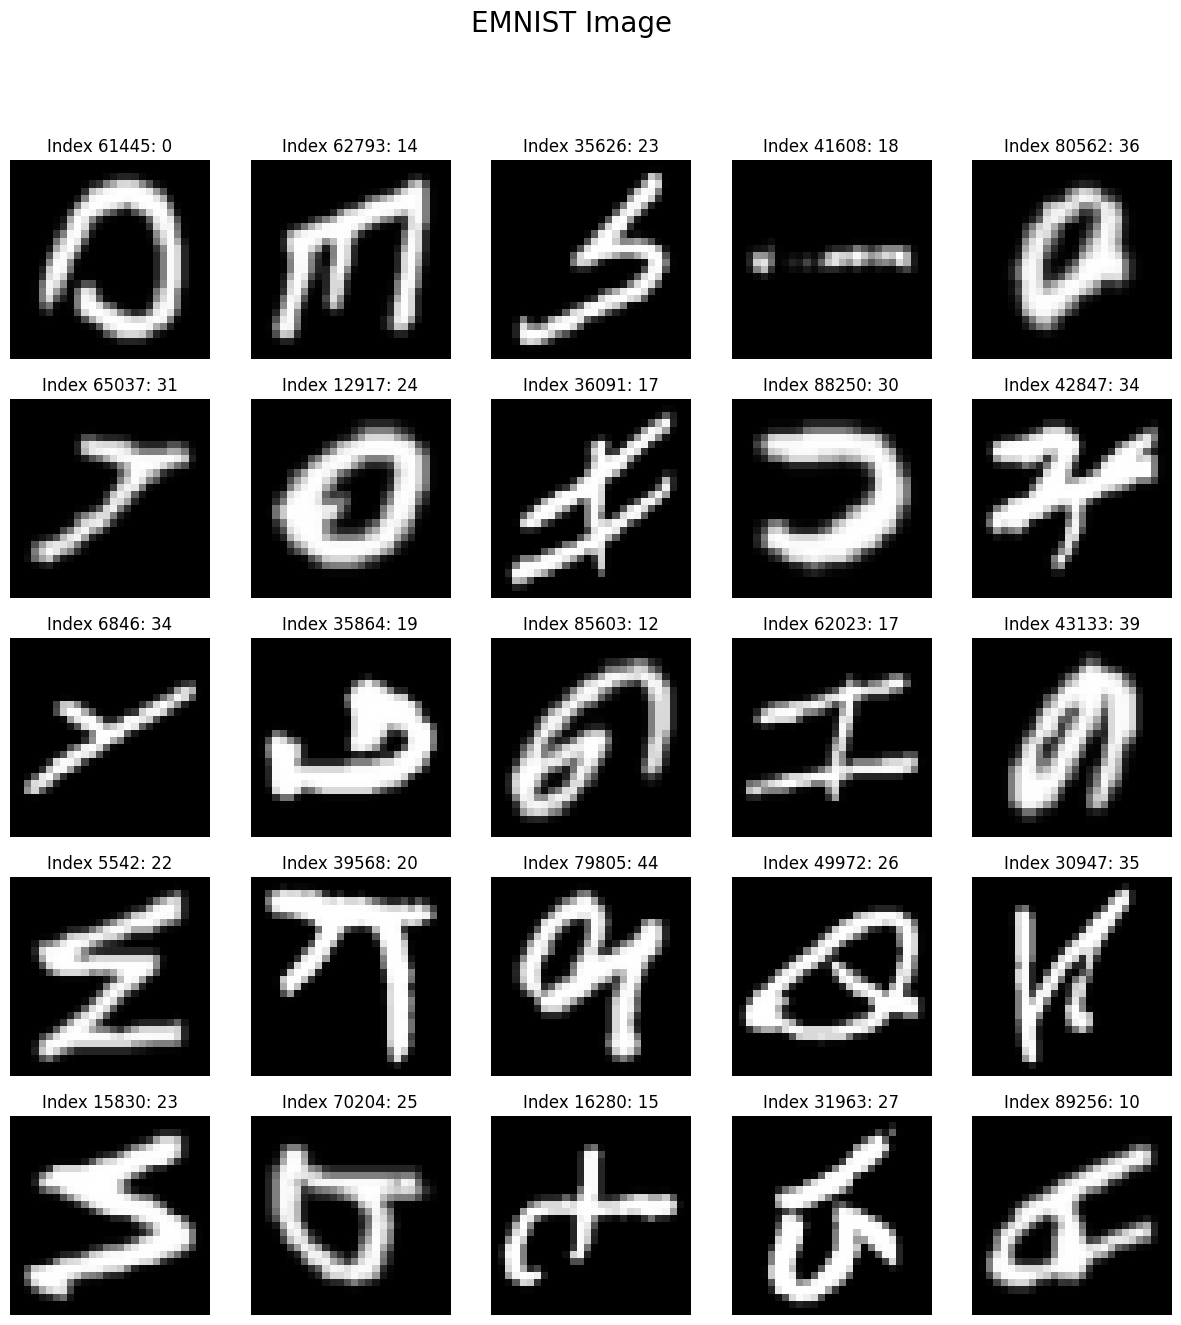

In [53]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.flatten()

for i in range(25):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  image, label = training_data[sample_idx]
  axes[i].imshow(image.squeeze(), cmap="gray")
  axes[i].set_title(f"Index {sample_idx}: {label}")
  axes[i].axis("off")
plt.suptitle("EMNIST Image", fontsize=20)
plt.show()

다양한 기호들이 있네요.. 모델을 정의하여 학습할 수 있도록 해보겠습니다!

데이터셋을 순회할 수 있는 `DataLoader`로 데이터를 불러오겠습니다.

학습을 위한 Batch 사이즈는 64로 설정하겠습니다.

In [54]:
from torch.utils.data import DataLoader

batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [55]:
# train 데이터 확인하기
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


In [56]:
train_features[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

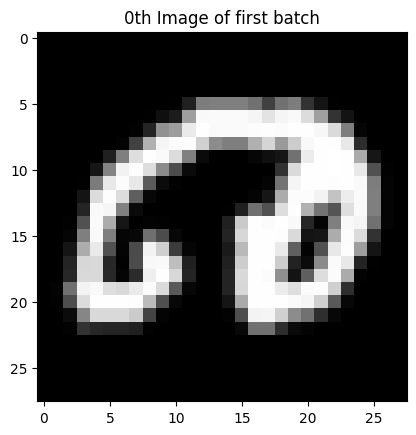

In [57]:
plt.imshow(train_features[0].squeeze(), cmap="gray")
plt.title("0th Image of first batch")
plt.show()

In [58]:
# test 데이터 확인하기
test_features, test_labels = next(iter(test_dataloader))
print(f"Feature batch shape: {test_features.size()}")
print(f"Labels batch shape: {test_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


제대로 불러와졌네요!

### 4-2. 모델 만들기

저희가 앞에서 다루었던 `nn.Linear()` 모듈을 가지고 학습을 진행해보겠습니다. 5개 층의 MLP로 모델을 구성하겠습니다.

이 모델에서는 일반화 성능을 위해 배치 정규화 기법, 드랍아웃 기법을 사용했습니다.

`GELU` 활성화 함수는 Gaussian Error Linear Unit으로 `ReLU` 활성화 함수의 변형입니다.

In [59]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()

        self.FC1 = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.BatchNorm1d(512),
            nn.Dropout(0.2),
            nn.GELU(),)

        self.FC2 = nn.Sequential(
            nn.Linear(512, 384),
            nn.BatchNorm1d(384),
            nn.Dropout(0.2),
            nn.GELU(),)

        self.FC3 = nn.Sequential(
            nn.Linear(384, 256),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),
            nn.GELU(),)

        self.FC4 = nn.Sequential(
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),
            nn.GELU(),)

        self.FC5 = nn.Sequential(
            nn.Linear(128, 47),
            nn.Softmax(dim=1),)

    def forward(self, x):
        x = self.flatten(x)
        x = self.FC1(x)
        x = self.FC2(x)
        x = self.FC3(x)
        x = self.FC4(x)
        logits = self.FC5(x)
        return logits

모델의 총 파라미터 수는 몇 개나 될까요? `torchsummary` 모듈을 통해 각 층마다 파라미터 수를 확인할 수 있습니다.

만약 이 모듈이 없다면, 아래의 코드로 다운로드 받을 수 있습니다.

> `pip install torchsummary`

우리 모델의 경우, 약 100만 개의 파라미터를 가지고 있네요.

In [60]:
model = NeuralNetwork()

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

from torchsummary import summary

print(summary(model, (1, 28, 28)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
       BatchNorm1d-3                  [-1, 512]           1,024
           Dropout-4                  [-1, 512]               0
              GELU-5                  [-1, 512]               0
            Linear-6                  [-1, 384]         196,992
       BatchNorm1d-7                  [-1, 384]             768
           Dropout-8                  [-1, 384]               0
              GELU-9                  [-1, 384]               0
           Linear-10                  [-1, 256]          98,560
      BatchNorm1d-11                  [-1, 256]             512
          Dropout-12                  [-1, 256]               0
             GELU-13                  [-1, 256]               0
           Linear-14                  [

### 4-3. 모델 학습

마지막으로 모델 학습을 진행하겠습니다. 먼저 평가 지표를 위해, `torchmetrics` 모듈을 설치해주겠습니다.

그리고 순회 객체의 진행상황을 쉽게 보여주는 `tqdm` 모듈 또한 설치해주겠습니다.

In [61]:
!pip install torchmetrics

In [62]:
!pip install tqdm

이제 학습을 위한 함수를 정의할게요.

각 epoch마다 학습(train)과 평가(valid)를 하고 손실 값과 평가 점수를 반환합니다.

In [63]:
import time

def train(model: nn.Module,
          train_dataloader: DataLoader,
          loss_fn,
          metric) -> tuple[float, float]:

    model.train()  # 신경망을 학습 모드로 전환
    total_loss = 0
    total_metric = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for x, y in tqdm(train_dataloader, desc="Train"):
        x, y = x.to(device), y.to(device)

        outputs = model(x)
        loss = loss_fn(outputs, y)

        # 경사를 0으로 초기화
        optimizer.zero_grad()

        # 역전파
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_metric += metric(outputs, y).item()

    return total_loss / len(train_dataloader), total_metric / len(train_dataloader)

def valid(model: nn.Module,
          valid_dataloader: DataLoader,
          loss_fn,
          metric) -> tuple[float, float]:

    model.eval()  # 신경망을 평가 모드로 전환
    total_loss = 0
    total_metric = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 평가를 수행
    for x, y in tqdm(valid_dataloader, desc="Valid"):
        x, y = x.to(device), y.to(device)

        outputs = model(x)
        loss = loss_fn(outputs, y)

        total_loss += loss.item()
        total_metric += metric(outputs, y).item()

    return total_loss / len(valid_dataloader), total_metric / len(valid_dataloader)

def train_valid(model: nn.Module,
          num_epochs: int,
          loss_fn,
          train_dataloader: DataLoader,
          valid_dataloader: DataLoader,
          metric) -> list[list, list, list, list]:

    train_loss_history, train_metric_history = [], []
    valid_loss_history, valid_metric_history = [], []

    # 수행 시간 체크
    t = time.time()

    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for epoch in range(num_epochs):
        print(f"epoch {epoch + 1} / {num_epochs}")
        train_loss, train_metric = train(model,
                          train_dataloader,
                          loss_fn,
                          metric)

        valid_loss, valid_metric = valid(model,
                           valid_dataloader,
                           loss_fn,
                           metric)

        # 각 epoch 마다 loss 추가
        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)

        # 각 epoch 마다 metric 추가
        train_metric_history.append(train_metric)
        valid_metric_history.append(valid_metric)

        t2 = time.time()

        print(f"train loss: {train_loss}, train metric: {train_metric}")
        print(f"valid loss: {valid_loss}, valid metric: {valid_metric}")
        print(f"Elapsed time: {t2 - t:.2f}s")

    return train_loss_history, train_metric_history, valid_loss_history, valid_metric_history

Multilabel의 손실 계산을 위해서는 `CrossEntropyLoss`를, 평가 지표를 위해서는 `AveragePrecision`를 사용하겠습니다.

Epoch를 20으로 설정할 경우, Colab에서 제공하는 무료 GPU인 T4로 10분 이내의 시간이 걸리네요..!

Epoch를 더 큰 수로 설정해주면 모델은 더 많은 시간 동안 학습합니다.

In [64]:
from torchmetrics import AveragePrecision
from tqdm import tqdm

num_classes = 47

device = "cuda" if torch.cuda.is_available() else "cpu"

model = NeuralNetwork()
model.to(device)

# 손실 함수 정의
loss_fn = nn.CrossEntropyLoss()
# 평가 기법 정의
metric = AveragePrecision(task="multiclass", num_classes=num_classes, thresholds=batch_size).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# 학습 & 검증
train_loss_history, train_metric_history, valid_loss_history, valid_metric_history = train_valid(model,
            num_epochs=20,
            loss_fn=loss_fn,
            train_dataloader=train_dataloader,
            valid_dataloader=valid_dataloader,
            metric=metric)

epoch 1 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 92.53it/s] 


train loss: 3.34751262394249, train metric: 0.4733373188063608
valid loss: 3.1673629216364354, valid metric: 0.5694176746326532
Elapsed time: 33.30s
epoch 2 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 110.44it/s]


train loss: 3.16835516209298, train metric: 0.5758770825380974
valid loss: 3.1178047738061747, valid metric: 0.5961756197994221
Elapsed time: 53.27s
epoch 3 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 111.95it/s]


train loss: 3.135933917464939, train metric: 0.5889051225591213
valid loss: 3.0990737186950597, valid metric: 0.5961688772139401
Elapsed time: 73.92s
epoch 4 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 94.28it/s] 


train loss: 3.1166767974271843, train metric: 0.6008317201061452
valid loss: 3.0905355846577933, valid metric: 0.613145567962198
Elapsed time: 94.59s
epoch 5 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 90.36it/s]


train loss: 3.104094819988765, train metric: 0.6078229305591989
valid loss: 3.0725464192733547, valid metric: 0.6214181919273506
Elapsed time: 116.86s
epoch 6 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 109.96it/s]


train loss: 3.0918323386645485, train metric: 0.6148881010129942
valid loss: 3.067681826545564, valid metric: 0.6204014022863621
Elapsed time: 136.60s
epoch 7 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 110.41it/s]


train loss: 3.0852117903689122, train metric: 0.6205290867293135
valid loss: 3.0618403903485696, valid metric: 0.6245724622149643
Elapsed time: 157.03s
epoch 8 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 89.97it/s] 


train loss: 3.0788307499378287, train metric: 0.6231072669544964
valid loss: 3.061290226982268, valid metric: 0.6266390343563415
Elapsed time: 177.87s
epoch 9 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 111.37it/s]


train loss: 3.0744950483876763, train metric: 0.623845921256018
valid loss: 3.0575824114823815, valid metric: 0.6247307431089979
Elapsed time: 198.03s
epoch 10 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 111.93it/s]


train loss: 3.0715137464780335, train metric: 0.6287437989568034
valid loss: 3.0560662516791153, valid metric: 0.6297244901528777
Elapsed time: 218.45s
epoch 11 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 92.38it/s] 


train loss: 3.064691003332747, train metric: 0.6301891666143499
valid loss: 3.052372825719817, valid metric: 0.6290197434067388
Elapsed time: 238.76s
epoch 12 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 110.53it/s]


train loss: 3.0623777502817466, train metric: 0.6305354907580302
valid loss: 3.0545874911732445, valid metric: 0.6290382558833438
Elapsed time: 258.82s
epoch 13 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 112.28it/s]


train loss: 3.0581189581688415, train metric: 0.6339661092622906
valid loss: 3.0545184983747875, valid metric: 0.6281900636366339
Elapsed time: 279.18s
epoch 14 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 90.44it/s] 


train loss: 3.0574927176144104, train metric: 0.6337368386645689
valid loss: 3.0475148938532928, valid metric: 0.6331508705028394
Elapsed time: 299.65s
epoch 15 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 111.94it/s]


train loss: 3.054171539705696, train metric: 0.636181205976094
valid loss: 3.0464314806562647, valid metric: 0.6307407536520161
Elapsed time: 319.36s
epoch 16 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 112.57it/s]


train loss: 3.0525664356583397, train metric: 0.6370986668564749
valid loss: 3.0480188587231947, valid metric: 0.6296202053260533
Elapsed time: 339.58s
epoch 17 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 89.85it/s] 


train loss: 3.049277234584727, train metric: 0.6384173274674314
valid loss: 3.047382576269739, valid metric: 0.6360155971293409
Elapsed time: 360.06s
epoch 18 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 111.36it/s]


train loss: 3.048158824021089, train metric: 0.6364511797191403
valid loss: 3.044784206844254, valid metric: 0.6312761037444258
Elapsed time: 380.00s
epoch 19 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 111.98it/s]


train loss: 3.0458811624675777, train metric: 0.6393750494042187
valid loss: 3.0415294697196895, valid metric: 0.6311996580858744
Elapsed time: 400.41s
epoch 20 / 20


Valid: 100%|██████████| 353/353 [00:03<00:00, 97.12it/s] 

train loss: 3.044264504419151, train metric: 0.6374185638013461
valid loss: 3.0441533175136146, valid metric: 0.6327470419427154
Elapsed time: 420.95s


학습이 끝났습니다! 마지막으로 모델의 파라미터 값을 저장해주면 끝입니다.

이렇게 저장된 모델은 나중에 `model.load_state_dict()`를 통해 다시 불러올 수 있습니다.

In [65]:
# 모델 저장하기
from datetime import date

title = "MLP_model_v1"
torch.save(model.state_dict(), f'{title}_{date.today()}.pth')

### 4-4. 학습 결과 확인하기

모델의 학습은 어떻게 진행되었을까요? 간단한 plot을 그려서 확인해보겠습니다.

Text(0, 0.5, 'Precision')

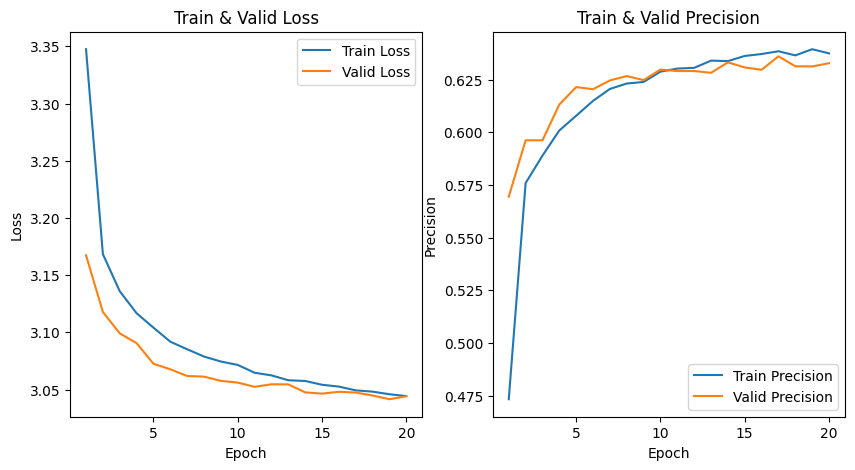

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()

sns.lineplot(x = range(1,1+len(train_loss_history)),y = train_loss_history, label='Train Loss', ax=axes[0])
sns.lineplot(x = range(1,1+len(valid_loss_history)),y = valid_loss_history, label='Valid Loss', ax=axes[0])

axes[0].set_title("Train & Valid Loss")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")

sns.lineplot(x = range(1,1+len(train_metric_history)),y = train_metric_history, label='Train Precision', ax=axes[1])
sns.lineplot(x = range(1,1+len(valid_metric_history)),y = valid_metric_history, label='Valid Precision', ax=axes[1])
axes[1].set_title("Train & Valid Precision")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Precision")

10번째 epoch 이후부터는 학습이 더딘 모습을 보이네요. 이번에는 어떤 레이블을 파악하기 어려워했을지 확인해봅시다.

동일한 모델을 다시 불러와서 Valid 데이터를 확인해볼게요.

In [84]:
# 저장된 파라미터를 모델에 불러옵니다.
model.load_state_dict(torch.load(f'{title}_{date.today()}.pth'))
model.eval()

preds = []
true_labels = []

# Valid 데이터를 사용하여 평가하기
with torch.no_grad():
  for batch in valid_dataloader:
    inputs, labels = batch
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)

    preds.append(outputs)
    true_labels.append(labels)

# flatten()이랑 동일
preds = torch.cat(preds)
true_labels = torch.cat(true_labels)

In [85]:
# 각 인덱스마다 최대인 값을 레이블로 치환
preds_labels = preds.max(dim=1).indices

In [86]:
# 전체 중 맞힌 비율
sum(true_labels == preds_labels)/len(true_labels)

tensor(0.8427, device='cuda:0')

전체 중에서는 84.27%를 맞췄네요.

In [88]:
average_precision = AveragePrecision(task="multiclass", num_classes=num_classes, average=None)
precision_res = average_precision(preds, true_labels)
precision_res = precision_res.cpu().numpy()

# 평균 정밀도가 높은 순서대로 인덱스 정렬
top_indices = np.argsort(precision_res)[::-1][:5]

# 평균 정밀도가 낮은 순서대로 인덱스 정렬
bottom_indices = np.argsort(precision_res)[:5]

# 가장 높은 평균 정밀도를 가진 상위 5개 클래스 출력
print("상위 5개 클래스")
for i, idx in enumerate(top_indices):
    print(f"Class {idx}: {precision_res[idx]:.4f}")
print()
# 가장 낮은 평균 정밀도를 가진 하위 5개 클래스 출력
print("하위 5개 클래스")
for i, idx in enumerate(bottom_indices):
    print(f"Class {idx}: {precision_res[idx]:.4f}")

상위 5개 클래스
Class 32: 0.9857
Class 3: 0.9830
Class 14: 0.9746
Class 33: 0.9723
Class 7: 0.9722

하위 5개 클래스
Class 21: 0.4631
Class 18: 0.4710
Class 1: 0.5409
Class 15: 0.5751
Class 40: 0.5799


상위 클래스에 대한 예측은 거의 1에 가까운 수준의 정밀도를 보여주는 데 반해, 하위 5개 클래스는 0.6도 되지 않습니다.

가장 낮은 정밀도를 가졌던 Class 21을 조사해보겠습니다.

In [92]:
true_labels = true_labels.cpu().numpy()
preds_labels = preds_labels.cpu().numpy()

class21_indices = np.where(true_labels == 21)[0]
random_indices = np.random.choice(class21_indices, 10)

for i, idx in enumerate(random_indices):
    sample = preds[idx].cpu().numpy()

    print(f"Sample {i}:")
    print(f"Pred Label: {preds_labels[idx]}")
    print(f"Label: {true_labels[idx]}")
    print()

Sample 0:
Pred Label: 21
Label: 21

Sample 1:
Pred Label: 21
Label: 21

Sample 2:
Pred Label: 42
Label: 21

Sample 3:
Pred Label: 21
Label: 21

Sample 4:
Pred Label: 18
Label: 21

Sample 5:
Pred Label: 21
Label: 21

Sample 6:
Pred Label: 21
Label: 21

Sample 7:
Pred Label: 21
Label: 21

Sample 8:
Pred Label: 21
Label: 21

Sample 9:
Pred Label: 37
Label: 21



Class 21은 1과 18을 헷갈려 하는군요. 랜덤으로 5개씩만 뽑아서 확인해보겠습니다.

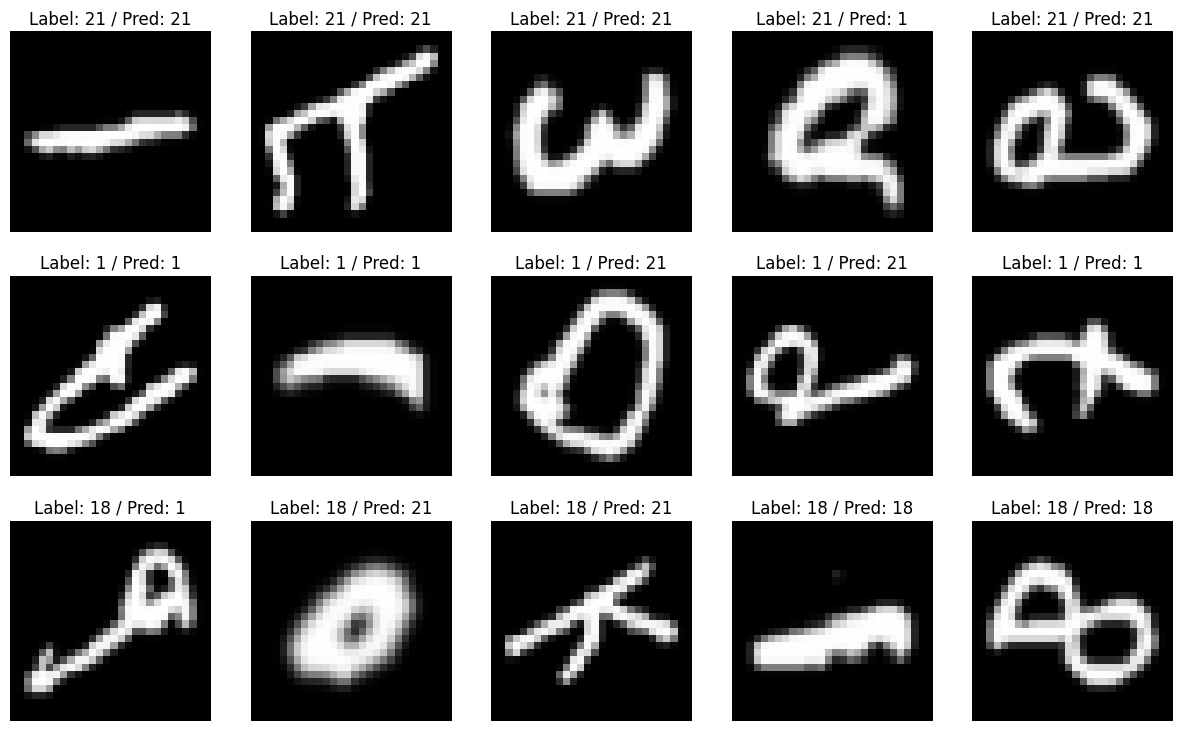

In [93]:
class21_indices = np.where(true_labels == 21)[0]
random_indices_21 = np.random.choice(class21_indices, 5, replace=False)

class1_indices = np.where(true_labels == 1)[0]
random_indices_1 = np.random.choice(class1_indices, 5, replace=False)

class18_indices = np.where(true_labels == 18)[0]
random_indices_18 = np.random.choice(class18_indices, 5, replace=False)

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

random_indices = np.concatenate([random_indices_21, random_indices_1, random_indices_18]).flatten()

for i, idx in enumerate(random_indices):
    axes[i].imshow(valid_data[idx][0].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {true_labels[idx]} / Pred: {preds_labels[idx]}")
    axes[i].axis('off')

모델의 학습 성능을 높이기 위해서는 어떻게 해야 할까요?

우리가 1주차에 배웠던 데이터 증강을 사용하거나, 비전 데이터에 적합한 모델을 사용한다면

예측 성능을 또 다시 끌어올릴 수 있을 것입니다.

1주차는 이렇게 마무리하도록 하겠습니다~ 모두 긴 튜토리얼 따라오시느라 고생 많으셨습니다.😅